In [3]:
from numpy import *
from qutip  import *
from matplotlib.pyplot import *
import numpy as np
import qutip as qt
from qutip import *
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
def H_3level_V(del_c, del_p, Omega_p, Omega_c,Gamma21,Gama31):
    #del_p = w_2-w_p
    term1 = -(del_p)*basis(3,1)*basis(3,1).dag()-(del_c)*basis(3,2)*basis(3,2).dag()
    term2 = -(Omega_p/2)*basis(3,0)*basis(3,1).dag()\
            -(Omega_c/2)*basis(3,0)*basis(3,2).dag()#drive
    H = term1 + term2 + term2.dag()
    A_relax   = (basis(3,0)*basis(3,1).dag())*np.sqrt(Gamma21)+\
    (basis(3,0)*basis(3,2).dag())*np.sqrt(Gama31)
    #A_dephase = tensor( sigmaz(), qeye(N+1)) * np.sqrt(dephase)
    return H,[A_relax]

In [5]:
def Vtype_Spectrum(Omega_p, Omega_c,Gamma21,Gama31,del_control,
                 del_list,control="NO"):
    
    spec = np.zeros(len( del_list), dtype=np.float64)
    pop_11 = np.zeros(len( del_list), dtype=np.float64)
    pop_22 = np.zeros(len( del_list), dtype=np.float64)
    pop_33 = np.zeros(len( del_list), dtype=np.float64)
    
    def spectrum(H, c_ops):
        rho_ss= steadystate(H, c_ops,solver='scipy')
        spec = rho_ss[1, 0].imag
        pop_11 = rho_ss[0, 0].real
        pop_22 =rho_ss[1, 1].real
        pop_33 =rho_ss[2, 2].real
        return spec, pop_11, pop_22, pop_33
    if control=="Probe":
        for i, del_c in enumerate(del_list):
            H ,c_ops = H_3level_V(del_c, del_control, Omega_p, Omega_c,Gamma21,Gama31)
            spec[i], pop_11[i], pop_22[i], pop_33[i] = spectrum(H ,c_ops)
    else:
        for i, del_p in enumerate(del_list):
            H ,c_ops = H_3level_V(del_control, del_p, Omega_p, Omega_c,Gamma21,Gama31)
            spec[i], pop_11[i], pop_22[i], pop_33[i] = spectrum(H ,c_ops)
            
    return spec, pop_11, pop_22, pop_33

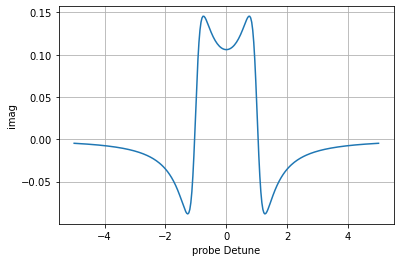

In [30]:
start=-5
end=5
point=301 
Gamma31 =3
Gamma21 =3
Omega_p = 0.2* (2*np.pi)
Omega_c = 2* (2*np.pi)
del_control=0

del_list = 2*pi*np.linspace(start, end, point)

#detune = 2*pi*linspace(-sweep_range,sweep_range,resolution)

spec = np.zeros(len( del_list), dtype=np.float64)
pop_11 = np.zeros(len( del_list), dtype=np.float64)
pop_22 = np.zeros(len( del_list), dtype=np.float64)
pop_33 = np.zeros(len( del_list), dtype=np.float64)
spec, pop_11, pop_22, pop_33= Vtype_Spectrum(Omega_p, Omega_c,Gamma21,Gamma31,del_control,
                 del_list,control="hi")
plt.plot(del_list/(2*pi),spec)
plt.xlabel("probe Detune")
plt.ylabel("imag")
plt.grid()

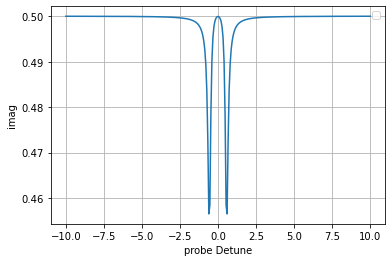

In [70]:
plt.plot(del_list/(2*pi),pop_11)
plt.xlabel("probe Detune")
plt.ylabel("imag")
plt.legend()
plt.grid()

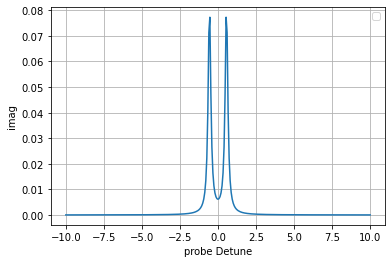

In [71]:
plt.plot(del_list/(2*pi),pop_22)
plt.xlabel("probe Detune")
plt.ylabel("imag")
plt.legend()
plt.grid()

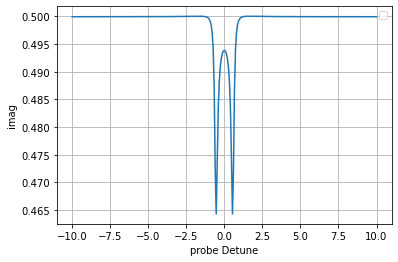

In [72]:
plt.plot(del_list/(2*pi),pop_33)
plt.xlabel("probe Detune")
plt.ylabel("imag")
plt.legend()
plt.grid()